In [ ]:
import sys
print(sys.version)

3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.compat import v1 as tf_v1
print(tf.version)
tf.compat.v1.disable_eager_execution()
import sklearn

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.6/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [ ]:
M = 2 ### Dimension of input
K = 3 ### Number of classified class
n = 100 ### Number of data in each class
N = n*K ### Number of all data

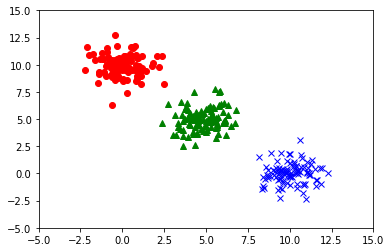

In [ ]:
X1 = np.random.randn(n, M) + np.array([0, 10])
X2 = np.random.randn(n, M) + np.array([5, 5])
X3 = np.random.randn(n, M) + np.array([10, 0])

T1 = np.array([[1, 0, 0] for i in range(n)])
T2 = np.array([[0, 1, 0] for i in range(n)])
T3 = np.array([[0, 0, 1] for i in range(n)])

X = np.concatenate((X1, X2, X3))
T = np.concatenate((T1, T2, T3))

plt.xlim([-5, 15])
plt.ylim([-5, 15])
plt.plot(X1[:,0], X1[:,1], 'o', color='red');
plt.plot(X2[:,0], X2[:,1], '^', color='green');
plt.plot(X3[:,0], X3[:,1], 'x', color='blue');

In [ ]:
x = tf_v1.placeholder(tf.float32, shape=[None, M])
W = tf.Variable(tf.zeros([M, K]))
b = tf.Variable(tf.zeros([K]))
'''
x = [
    [x_00, x_01],
    [x_10, x_11],
    [x_20, x_21],
        :
        :
    [x_N0, x_N1]
]

W = [
    [w_00, w_01, w_02],
    [w_10, w_11, w_12]
]

b = [b_0, b_1, b_2]
'''

y = tf.nn.softmax(tf.matmul(x, W) + b)
t = tf_v1.placeholder(tf.float32, shape=[None, K])
'''

y = [
    [y_00, y_01, y_02],
    [y_10, y_11, y_12],
    [y_20, y_21, y_22],
        :
        :
    [y_N0, y_N1, y_N2]
] = [
    [w_00*x_00+w_10*x_01+b_0, w_01*x_00+w_11*x_01+b_1, w_02*x_00+w_12*x_01+b_2],
    [w_00*x_10+w_10*x_11+b_0, w_01*x_10+w_11*x_11+b_1, w_02*x_10+w_12*x_11+b_2],
    [w_00*x_20+w_10*x_21+b_0, w_01*x_20+w_11*x_21+b_1, w_02*x_20+w_12*x_21+b_2],
        :
        :
    [w_00*x_N0+w_10*x_N1+b_0, w_01*x_N0+w_11*x_N1+b_1, w_02*x_N0+w_12*x_N1+b_2],
]

t = [
    [1, 0, 0],
    [1, 0, 0],
        :
        :
    [0, 1, 0],
    [0, 1, 0],
        :
        :
    [0, 0, 1],
    [0, 0, 1]
]
'''

cross_entropy = tf.reduce_mean(-tf.reduce_sum(t*tf.math.log(y), axis=1))
learning_rate = 0.1
train_step = tf_v1.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
init = tf_v1.global_variables_initializer()
sess = tf_v1.Session()
sess.run(init)

batch_size = 50
n_batchs = N // batch_size

for epoch in range(30):
    X_shuffle, T_shuffle = sklearn.utils.shuffle(X, T)

    for i in range(n_batchs):
        start = i * batch_size
        end = start + batch_size

        sess.run(train_step, feed_dict={
            x: X_shuffle[start:end],
            t: T_shuffle[start:end],
        })

In [ ]:
X_shuffle, T_shuffle = sklearn.utils.shuffle(X, T)

correct_prediciton = tf.equal(tf.argmax(y, axis=1), tf.argmax(t, axis=1))
classified = correct_prediciton.eval(session=sess, feed_dict={
    x: X_shuffle[0:10],
    t: T_shuffle[0:10]
})
print('classified =')
print(classified)
print()

prob = y.eval(session=sess, feed_dict={
    x: X_shuffle[0:10]
})
print('prob =')
print(prob)
print()

classified =
[ True  True  True  True  True  True  True  True  True  True]

prob =
[[1.41254679e-08 2.28236038e-02 9.77176428e-01]
 [7.57910179e-10 1.55001767e-02 9.84499812e-01]
 [9.88417447e-01 1.15825143e-02 2.40805553e-09]
 [5.84778392e-10 4.05605230e-03 9.95943964e-01]
 [9.55839515e-01 4.41603437e-02 7.75874867e-08]
 [9.85627532e-01 1.43724084e-02 2.07704232e-09]
 [9.97050047e-01 2.94992025e-03 9.92556259e-10]
 [5.86172266e-09 3.21871787e-02 9.67812836e-01]
 [1.78423474e-11 6.01953536e-04 9.99397993e-01]
 [1.19352910e-06 1.16257556e-01 8.83741260e-01]]



In [ ]:
print('W = ', sess.run(W))
print()

print('b = ', sess.run(b))
print()

W =  [[-1.193505    0.32793137  0.8655732 ]
 [ 0.88161117  0.34673497 -1.2283461 ]]

b =  [-0.07274096  0.14505988 -0.07231893]



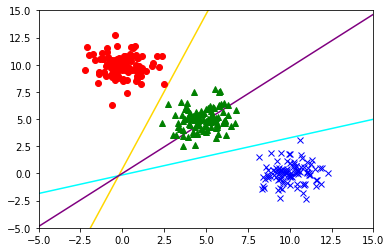

In [ ]:
w_00 = sess.run(W)[0, 0];   w_01 = sess.run(W)[0, 1];   w_02 = sess.run(W)[0, 2]
w_10 = sess.run(W)[1, 0];   w_11 = sess.run(W)[1, 1];   w_12 = sess.run(W)[1, 2]

b_0 = sess.run(b)[0];   b_1 = sess.run(b)[1];   b_2 = sess.run(b)[2]

classified_line_0_1_x = np.linspace(-5, 15, 100)
classified_line_0_1_y = 1.0 / (w_10  - w_11) * ((w_01 - w_00)*classified_line_0_1_x + (b_1 - b_0))
plt.plot(classified_line_0_1_x, classified_line_0_1_y, color='gold')

classified_line_1_2_x = np.linspace(-5, 15, 100)
classified_line_1_2_y = 1.0 / (w_11 - w_12) * ((w_02 - w_01)*classified_line_1_2_x + (b_2 - b_1))
plt.plot(classified_line_1_2_x, classified_line_1_2_y, color='cyan')

classified_line_2_0_x = np.linspace(-5, 15, 100)
classified_line_2_0_y = 1.0 / (w_12 - w_10) * ((w_00 - w_02)*classified_line_2_0_x + (b_0 - b_2))
plt.plot(classified_line_2_0_x, classified_line_2_0_y, color='purple')

plt.xlim([-5, 15])
plt.ylim([-5, 15])
plt.plot(X1[:,0], X1[:,1], 'o', color='red');
plt.plot(X2[:,0], X2[:,1], '^', color='green');
plt.plot(X3[:,0], X3[:,1], 'x', color='blue');